In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df_train = pd.read_csv('C:/Users/vipul/Downloads/Amazon Employee Access/train.csv')

In [3]:
df_test = pd.read_csv('C:/Users/vipul/Downloads/Amazon Employee Access/test.csv')

In [4]:
df_train.shape

(32769, 10)

In [5]:
df_test.shape

(912363, 10)

In [6]:
df_train.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [7]:
df_test.columns

Index(['id', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [9]:
df_train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [10]:
df_test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,32642,7792,118573,118574,117945,136261,128463,292795,119082
1,2,4696,14638,117961,118343,118514,118321,289122,255851,118322
2,3,22662,1760,118887,118888,120171,118396,255118,118398,118399
3,4,75078,7576,117961,118052,120671,118321,117906,257051,118322
4,5,39879,55668,117902,118041,117945,135951,134458,19776,119082


In [26]:
df_train.ACTION.unique()

array([1, 0], dtype=int64)

In [28]:
df_test.id.nunique()

912363

In [29]:
df_train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [30]:
df_test.isnull().sum()

id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

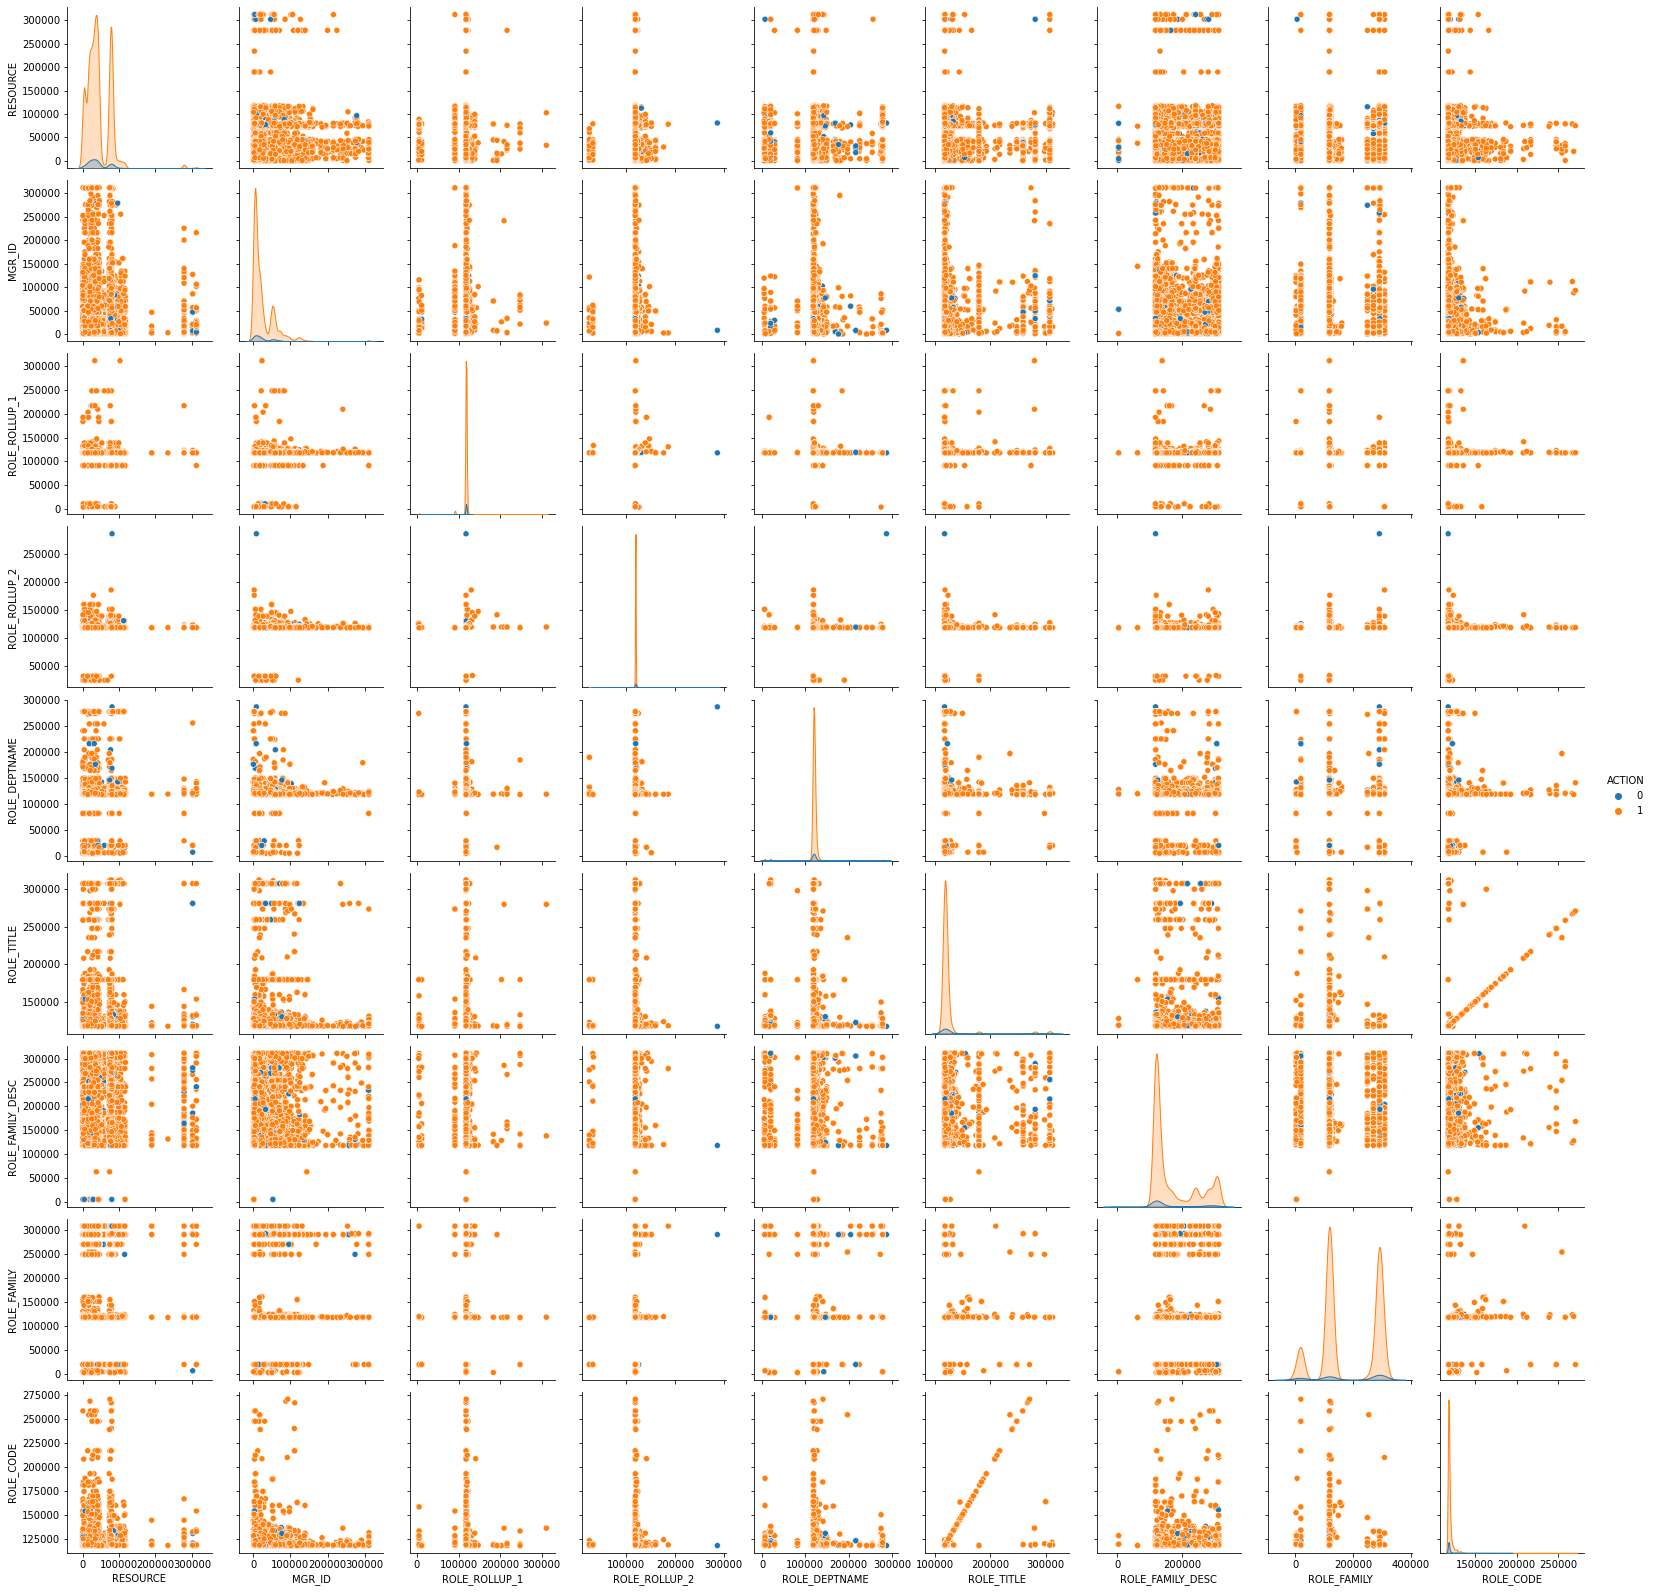

In [37]:
sns.pairplot(data = df_train, hue = 'ACTION')

<AxesSubplot:>

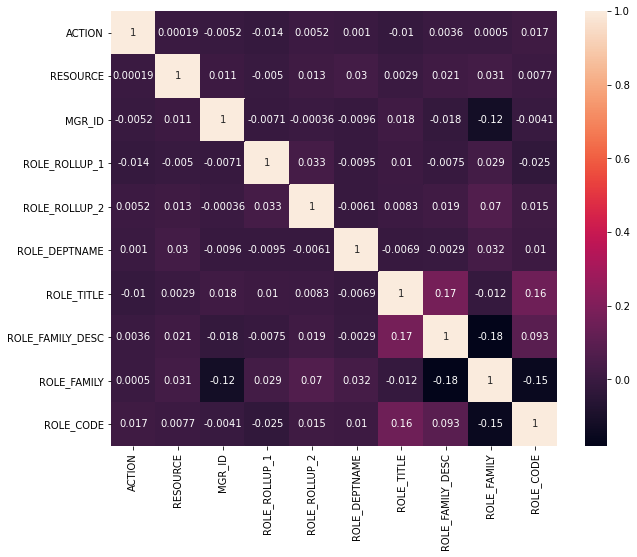

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True)

In [48]:
df_train.drop(columns='MGR_ID',axis=1,inplace=True)

In [49]:
df_test.drop(columns=['MGR_ID','id'],axis=1,inplace=True)

In [50]:
df_train.head(1)

,ACTION,RESOURCE,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,117961,118300,123472,117905,117906,290919,117908


In [51]:
df_test.head(1)

,RESOURCE,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,32642,118573,118574,117945,136261,128463,292795,119082


In [52]:
X = df_train.drop('ACTION',axis=1)
y = df_train.ACTION

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [55]:
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
pred = model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       557
           1       0.94      1.00      0.97      9274

    accuracy                           0.94      9831
   macro avg       0.47      0.50      0.49      9831
weighted avg       0.89      0.94      0.92      9831



C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print(confusion_matrix(y_test,pred))

[[   0  557]
 [   0 9274]]


In [61]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [62]:
model = [SVC(),RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB()]

In [63]:
for m in model:
    m.fit(X_train,y_train)
    m_pred = m.predict(X_test)
    
    print(classification_report(y_test,m_pred))
    print(confusion_matrix(y_test,m_pred))

C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       557
           1       0.94      1.00      0.97      9274

    accuracy                           0.94      9831
   macro avg       0.47      0.50      0.49      9831
weighted avg       0.89      0.94      0.92      9831

[[   0  557]
 [   0 9274]]
              precision    recall  f1-score   support

           0       0.50      0.32      0.39       557
           1       0.96      0.98      0.97      9274

    accuracy                           0.94      9831
   macro avg       0.73      0.65      0.68      9831
weighted avg       0.93      0.94      0.94      9831

[[ 177  380]
 [ 178 9096]]
              precision    recall  f1-score   support

           0       0.31      0.37      0.34       557
           1       0.96      0.95      0.96      9274

    accuracy                           0.92      9831
   macro avg       0.64      0.66      0.65      9831
weighted avg       0

<AxesSubplot:>

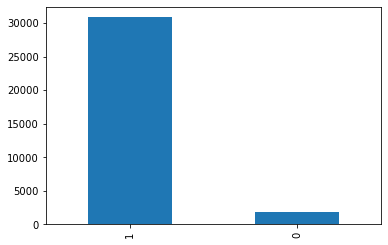

In [33]:
df_train.ACTION.value_counts().plot(kind = 'bar')

In [34]:
from imblearn.over_sampling import SMOTE

In [64]:
sm = SMOTE()

In [75]:
X,y = sm.fit_resample(X,y)

<AxesSubplot:xlabel='ACTION', ylabel='count'>

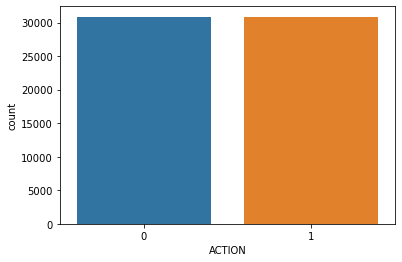

In [77]:
sns.countplot(x = y)

In [78]:
model =  [LogisticRegression(),SVC(),RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB()]

In [79]:
for m in model:
    m.fit(X_train,y_train)
    m_pred = m.predict(X_test)
    
    print(classification_report(y_test,m_pred))
    print(confusion_matrix(y_test,m_pred))

C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       557
           1       0.94      1.00      0.97      9274

    accuracy                           0.94      9831
   macro avg       0.47      0.50      0.49      9831
weighted avg       0.89      0.94      0.92      9831

[[   0  557]
 [   0 9274]]


C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vipul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       557
           1       0.94      1.00      0.97      9274

    accuracy                           0.94      9831
   macro avg       0.47      0.50      0.49      9831
weighted avg       0.89      0.94      0.92      9831

[[   0  557]
 [   0 9274]]
              precision    recall  f1-score   support

           0       0.49      0.32      0.38       557
           1       0.96      0.98      0.97      9274

    accuracy                           0.94      9831
   macro avg       0.72      0.65      0.68      9831
weighted avg       0.93      0.94      0.94      9831

[[ 176  381]
 [ 185 9089]]
              precision    recall  f1-score   support

           0       0.32      0.37      0.34       557
           1       0.96      0.95      0.96      9274

    accuracy                           0.92      9831
   macro avg       0.64      0.66      0.65      9831
weighted avg       0